Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [2]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#### load the movie dataset and create their dataframes

movies_df = pd.read_csv("movies.csv")
movies_df.head(2)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'] from the data set as they will not be used in the analysis.

In [4]:
# drop columnes that will not used in the analysis
movies_df = movies_df.drop(['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'], axis = 1)
movies_df.head(2)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500


#### Remove any duplicate rows

In [5]:
# remove duplicate rows
# it keeps 1st record by default 
movies_df = movies_df.drop_duplicates()


#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [6]:
# quick check at data types & null counts
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   popularity            4803 non-null   float64
 4   production_countries  4803 non-null   object 
 5   release_date          4802 non-null   object 
 6   revenue               4803 non-null   int64  
 7   runtime               4801 non-null   float64
 8   spoken_languages      4803 non-null   object 
 9   title                 4803 non-null   object 
 10  vote_average          4803 non-null   float64
 11  vote_count            4803 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 487.8+ KB


In [7]:
# check missing value
movies_df.isnull().sum()


budget                  0
genres                  0
id                      0
popularity              0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [8]:
# it seems no null value for 'revenue' and 'budget'

# the two lines below can be used if there is a null value
movies_df.drop(movies_df[movies_df['budget'] == 0].index, inplace = True) 
movies_df.drop(movies_df[movies_df['revenue'] == 0].index, inplace = True) 

#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [9]:
# Change the release_date column to DateTime column
movies_df["release_date"] = pd.to_datetime(movies_df["release_date"])

# Extract the release year from every release date
movies_df["release_year"] = movies_df["release_date"].dt.strftime('%Y')
# convert 'release_year' into int
#movies_df ["release_year"] = movies_df["release_year"].astype(np.int64)

movies_df["release_year"]

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4773    1994
4788    1972
4792    1997
4796    2004
4798    1992
Name: release_year, Length: 3229, dtype: object

#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [10]:
# change 'budget' and 'revenue' columns format to integer
# it seems they are already int from current data, here is for practise only
movies_df ["budget"] = movies_df["budget"].apply(np.int64)
movies_df ["revenue"] = movies_df["revenue"].apply(np.int64)

print(movies_df.dtypes[['budget', 'revenue']])

budget     int64
revenue    int64
dtype: object


On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [11]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
#parse_col_json('cast', 'name')
parse_col_json('production_countries', 'name')

movies_df.head(2)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007


In [12]:
# check dataset information after all data preparation
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4798
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3229 non-null   int64         
 1   genres                3229 non-null   object        
 2   id                    3229 non-null   int64         
 3   popularity            3229 non-null   float64       
 4   production_countries  3229 non-null   object        
 5   release_date          3229 non-null   datetime64[ns]
 6   revenue               3229 non-null   int64         
 7   runtime               3229 non-null   float64       
 8   spoken_languages      3229 non-null   object        
 9   title                 3229 non-null   object        
 10  vote_average          3229 non-null   float64       
 11  vote_count            3229 non-null   int64         
 12  release_year          3229 non-null   object        
dtypes: datetime64[ns](

### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [13]:
# use sort, to find out the 5 most expensive movies
movies_df.sort_values('budget', ascending = False).head(5)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
17,380000000,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,2015
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,5.4,1400,2006
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


In [14]:
# use sort, to find out the 5 cheapest movies
movies_df.sort_values('budget').head(5)


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
4238,1,"['Drama', 'Comedy']",3082,28.276480,['United States of America'],1936-02-05,8500000,87.0,['English'],Modern Times,8.1,856,1936
3611,4,"['Drama', 'Romance', 'War']",22649,1.199451,['United States of America'],1932-12-08,25,89.0,['English'],A Farewell to Arms,6.2,28,1932
3372,7,"['Thriller', 'Action', 'Horror', 'Science Fict...",13006,4.857028,['United Kingdom'],1992-05-01,5,90.0,['English'],Split Second,5.7,63,1992
3419,7,"['Comedy', 'Drama', 'Foreign', 'Romance']",38415,0.050456,[],2009-08-09,7,82.0,[],Bran Nue Dae,5.2,6,2009
4608,8,"['Fantasy', 'Horror', 'Thriller']",11980,11.818333,['United States of America'],1995-09-01,16,98.0,['English'],The Prophecy,6.4,138,1995


_From above information, it seems that the most expensive movies do not always mean that they will have a vote_average and guaranteed good return. For the top 5 most expensive movies, though they all have some profit, the overall profitability((revenue-budget)/budget) is not as good as some of the cheaper movies. Movies with lower investment could also result in a good return in profit._

#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [15]:
# find the top 5 most profitable movies
movies_df['profit'] = movies_df.revenue - movies_df.budget
movies_df.sort_values('profit', ascending = False).head(5)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,2550965087
25,200000000,"['Drama', 'Romance', 'Thriller']",597,100.025899,['United States of America'],1997-11-18,1845034188,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Titanic,7.5,7562,1997,1645034188
28,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",135397,418.708552,['United States of America'],2015-06-09,1513528810,124.0,['English'],Jurassic World,6.5,8662,2015,1363528810
44,190000000,['Action'],168259,102.322217,"['Japan', 'United States of America']",2015-04-01,1506249360,137.0,['English'],Furious 7,7.3,4176,2015,1316249360
16,220000000,"['Science Fiction', 'Action', 'Adventure']",24428,144.448633,['United States of America'],2012-04-25,1519557910,143.0,['English'],The Avengers,7.4,11776,2012,1299557910


In [16]:
# the least profitable movies
movies_df.sort_values('profit').head(5)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
13,255000000,"['Action', 'Adventure', 'Western']",57201,49.046956,['United States of America'],2013-07-03,89289910,149.0,['English'],The Lone Ranger,5.9,2311,2013,-165710090
338,145000000,"['Western', 'History', 'War']",10733,10.660441,['United States of America'],2004-04-07,25819961,137.0,"['English', 'Español']",The Alamo,5.8,106,2004,-119180039
141,150000000,"['Adventure', 'Animation', 'Family']",50321,12.362599,['United States of America'],2011-03-09,38992758,88.0,['English'],Mars Needs Moms,5.5,199,2011,-111007242
208,160000000,"['Adventure', 'Fantasy', 'Action']",1911,27.220157,['United States of America'],1999-08-27,61698899,102.0,"['English', 'Norsk']",The 13th Warrior,6.4,510,1999,-98301101
311,100000000,"['Action', 'Comedy', 'Science Fiction']",11692,12.092241,"['Australia', 'United States of America']",2002-08-15,7103973,95.0,['English'],The Adventures of Pluto Nash,4.4,142,2002,-92896027


_From above data, it seems that the most profitable movie(max) have very similar investment with the least profitable movie(min), which are 237,000,000 and 255,000,000. However, one has a profit of 2,550,965,087 and the other is -165,710,090. Both movies are under similar ‘genres’ type and very close runtime and are both available in English. It could also be told from the tables that their main differences are with columns ‘popularity’, ‘vote_average’, and ‘vote_count’. The most profitable movie(max) has much higher values of these features compared with the least profitable movie(min)._

#### Find the most talked about movies. Sort the dataframe based on the popularity column.

In [17]:
# find the most talked about movies, based on 'popularity'
movies_df.sort_values('popularity', ascending = False).head(5)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
546,74000000,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,875.581305,['United States of America'],2015-06-17,1156730962,91.0,['English'],Minions,6.4,4571,2015,1082730962
95,165000000,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,675120017,169.0,['English'],Interstellar,8.1,10867,2014,510120017
788,58000000,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,783112979,108.0,['English'],Deadpool,7.4,10995,2016,725112979
94,170000000,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,773328629,121.0,['English'],Guardians of the Galaxy,7.9,9742,2014,603328629
127,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,378858340,120.0,['English'],Mad Max: Fury Road,7.2,9427,2015,228858340


_It can be seen from above table that the most talked about movie does not necessarily have the highest ‘vote_average’ and ‘vote_count’. But their ‘vote_average’ value is generally high and have positive profit._

#### Find Movies which are rated above 7



In [18]:
# find movies are rated above 7

movies_df_above7 = movies_df[movies_df['vote_average'] > 7]
movies_df_above7



,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,2550965087
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012,834939099
6,260000000,"['Animation', 'Family']",38757,48.681969,['United States of America'],2010-11-24,591794936,100.0,['English'],Tangled,7.4,3330,2010,331794936
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,2015,1125403694
8,250000000,"['Adventure', 'Fantasy', 'Family']",767,98.885637,"['United Kingdom', 'United States of America']",2009-07-07,933959197,153.0,['English'],Harry Potter and the Half-Blood Prince,7.4,5293,2009,683959197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,160000,"['Documentary', 'History']",1779,3.284903,['United States of America'],1989-09-01,6706368,91.0,['English'],Roger & Me,7.4,90,1989,6546368
4724,10000,"['Drama', 'Fantasy', 'Horror', 'Science Fiction']",985,20.399578,['United States of America'],1977-03-19,7000000,89.0,['English'],Eraserhead,7.5,485,1977,6990000
4738,60000,"['Mystery', 'Drama', 'Thriller']",473,27.788067,['United States of America'],1998-07-10,3221152,84.0,['English'],Pi,7.1,586,1998,3161152
4773,27000,['Comedy'],2292,19.748658,['United States of America'],1994-09-13,3151130,92.0,['English'],Clerks,7.4,755,1994,3124130


_From results above, there are a total number of 637 movies with rating higher than 7 in the dataset._

#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [19]:
# find which year we have the most profitable movies
# use assumption that the year has the most profit
movies_df.groupby (['release_year'])['profit'].sum().sort_values(ascending = False)


release_year
2014    17029736072
2012    16665370551
2015    16082841939
2013    15191240622
2009    13798015000
           ...     
1929        3979000
1933        3842000
1935        2593000
1932             21
1927      -91969578
Name: profit, Length: 89, dtype: int64

_From results above, it can be told that the most successful release year is in 2014, and the year 1927 was the least successful. There are probably more insights to draw from these data if knowing what has happened in the world and what movies are released in these years and try to correlate them. However, this will not be covered in this exploratory study._

#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

<Figure size 1800x6500 with 0 Axes>

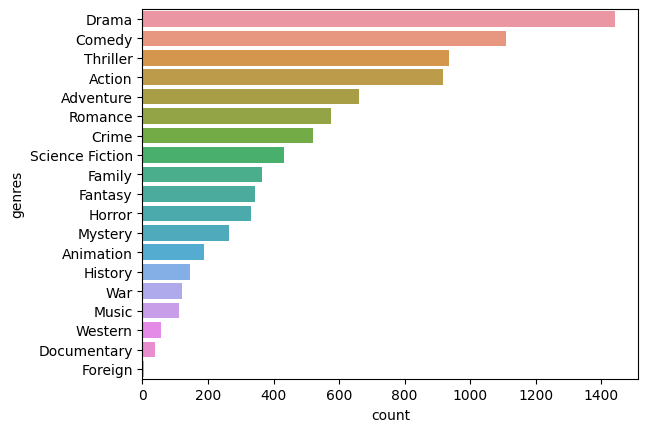

<Figure size 1800x6500 with 0 Axes>

In [20]:
 # find most successful genres
 # bar plot explaining the frequency of movies in each genre
movies_df['genres'] = movies_df['genres'].apply(ast.literal_eval)
sns.countplot(data = movies_df,
            y = movies_df.genres.explode(), # expode each list of genres to new row and plot 
            order = movies_df.genres.explode().value_counts().index # order by largest frequency of genre
            )
plt.figure(figsize = (18, 65))


_From above data, it can be found that the top 3 most successful genres are ‘Drama’, ‘Comedy’, ‘Thriller’ respectively._

Text(0, 0.5, 'profit')

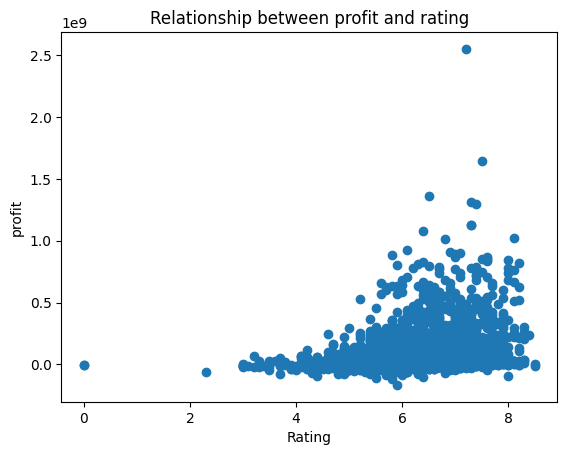

In [21]:
# check 'profit' with 'rating' relationship

plt.scatter(x = movies_df['vote_average'],
            y = movies_df['profit'])
plt.title('Relationship between profit and rating')
plt.xlabel ('Rating')
plt.ylabel ('profit')


_From the result, high rating may not always make the movie profitable. However, there is a trend that the higher rating the movie has, the more likely that it will be profitable. It can also be noticed from the graph that when rating is less than 4, the movie is generally not very much profitable._

Text(0, 0.5, 'Popularity')

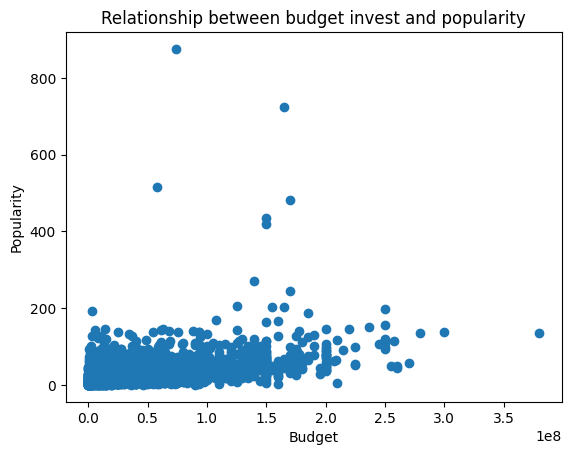

In [22]:
# check whether 'budget' invest has any relationship with 'popularity'"Capstone Project II.ipynb"
plt.scatter(x = movies_df['budget'],
            y = movies_df['popularity'])
plt.title('Relationship between budget invest and popularity')
plt.xlabel ('Budget')
plt.ylabel ('Popularity')

_From the result, movie budget does not seem to have any significant influence on its popularity. Therefore, investing more money in a movie, does not mean that it will be successful._

Text(0, 0.5, 'Popularity')

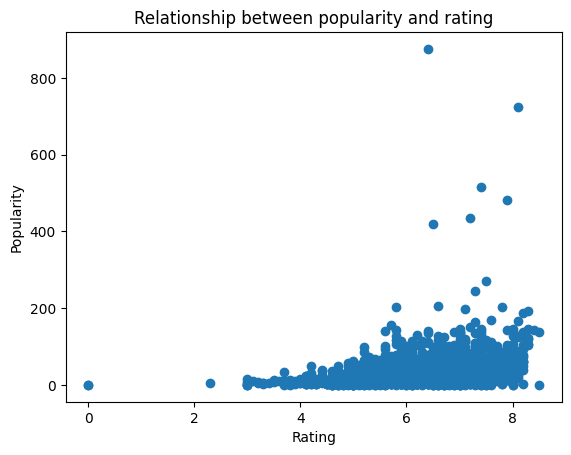

In [23]:
# check relationship between 'popularity' and rating
plt.scatter(x = movies_df['vote_average'],
            y = movies_df['popularity'])
plt.title('Relationship between popularity and rating')
plt.xlabel ('Rating')
plt.ylabel ('Popularity')

_From the result, it seems that in general when a movie has higher rating, it is more likely to be popular. This might not be indefinite for high rating movies, but it can be noticed from the graph that movies with rating lower than 4 have very low popularity._

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)